In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [7]:
x = load_breast_cancer().data
y = load_breast_cancer().target

In [21]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
data = pd.DataFrame(x, columns=load_breast_cancer().feature_names)

In [10]:
data['labels'] = y

In [11]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense, Dropout

In [17]:
from tensorflow.keras import backend as k

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
NN = Sequential()

In [35]:
NN.add(Dense(13, activation='relu', input_shape=(30,)))
NN.add(Dense(1, activation='sigmoid', ))

In [36]:
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
NN.fit(x_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 0.8008 - accuracy: 0.3869
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.7543 - accuracy: 0.3945
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.3995
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.4121
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.4422
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.4673
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.5025
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.5578
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.6106
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.6709
Epoch 11/150
4/4 [===========

In [38]:
NN.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9825


[0.07677063345909119, 0.9824561476707458]

In [7]:
from sklearn.datasets import load_digits

In [8]:
digits = load_digits()

In [9]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [10]:
x = load_digits().data
y = load_digits().target
x_image = load_digits().images

In [11]:
x_image

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [48]:
np.max(x_image)

16.0

In [20]:
x_image.shape

(1797, 8, 8)

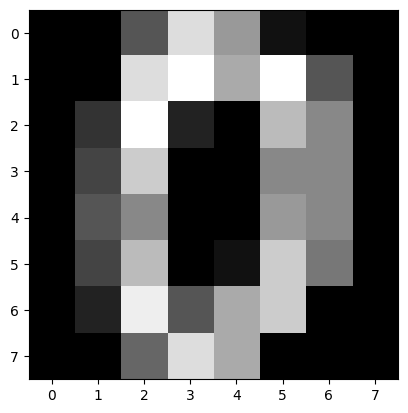

In [12]:
plt.imshow(x_image[0], cmap='gray')

In [49]:
from tensorflow.keras.layers import Flatten

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_image, y, train_size=0.7, shuffle=True)

In [51]:
x_train = x_train / 16
x_test = x_test / 16

In [52]:
mlp=Sequential()

In [53]:
mlp.add(Flatten(input_shape=(8,8)))
mlp.add(Dense(200,activation='relu'))
mlp.add(Dense(10,activation='softmax'))

In [54]:
mlp.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
mlp.fit(x_train,y_train,batch_size=180,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 2.2595 - accuracy: 0.2092
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 2.0117 - accuracy: 0.5648
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.7772 - accuracy: 0.7924
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1.5487 - accuracy: 0.8544
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 1.3315 - accuracy: 0.8791
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1350 - accuracy: 0.8902
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9636 - accuracy: 0.8958
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.9093
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.9133
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.9157
Epoch 11/100
7/7 [===========

In [56]:
x_test[0]

array([[0.    , 0.    , 0.8125, 1.    , 1.    , 1.    , 0.5   , 0.    ],
       [0.    , 0.125 , 1.    , 0.8125, 0.5   , 0.25  , 0.0625, 0.    ],
       [0.    , 0.4375, 1.    , 0.0625, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.6875, 0.9375, 0.75  , 0.3125, 0.    , 0.    , 0.    ],
       [0.    , 0.3125, 1.    , 1.    , 1.    , 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.375 , 1.    , 0.125 , 0.    , 0.    ],
       [0.    , 0.    , 0.1875, 0.9375, 0.5625, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6875, 0.875 , 0.    , 0.    , 0.    , 0.    ]])

In [57]:
mlp.predict(x_test)

17/17 [==============================] - 0s 1ms/step


array([[4.2087407e-07, 2.1430369e-06, 3.7922838e-08, ..., 1.6767796e-04,
        4.9988644e-06, 6.3618104e-06],
       [1.8444585e-07, 5.0334227e-03, 2.8842201e-06, ..., 9.9307090e-01,
        3.6096717e-06, 1.4767290e-06],
       [9.9909854e-01, 2.2376136e-09, 2.2757129e-06, ..., 2.4810043e-07,
        2.0651082e-06, 9.0425274e-06],
       ...,
       [5.0732951e-10, 2.0151412e-09, 2.0618258e-05, ..., 3.8570812e-07,
        2.0636060e-07, 2.8811830e-05],
       [1.5455067e-01, 8.1995323e-02, 4.5924081e-04, ..., 9.6415992e-05,
        5.2054065e-01, 4.0862896e-02],
       [2.8898855e-06, 3.0018576e-08, 1.3628022e-08, ..., 1.0803946e-06,
        3.2244861e-05, 2.6975104e-04]], dtype=float32)

In [58]:
pr=mlp.predict(x_test)

17/17 [==============================] - 0s 1ms/step


In [59]:
np.argmax(pr[0,:])

5

In [60]:
out=[]
for i in pr:
    out.append(np.argmax(i))
out=np.array(out)
out

array([5, 7, 0, 8, 6, 8, 6, 7, 0, 3, 2, 6, 5, 1, 0, 5, 2, 9, 4, 0, 6, 1,
       9, 1, 5, 9, 9, 9, 7, 8, 7, 7, 6, 5, 2, 9, 6, 5, 4, 0, 0, 2, 8, 7,
       6, 4, 7, 7, 3, 0, 6, 6, 4, 2, 9, 4, 3, 5, 3, 7, 1, 5, 9, 1, 0, 8,
       0, 5, 4, 9, 7, 5, 6, 7, 2, 8, 6, 4, 4, 0, 9, 3, 8, 7, 7, 4, 6, 3,
       4, 6, 4, 0, 3, 1, 3, 6, 2, 7, 9, 9, 9, 0, 6, 5, 2, 4, 2, 8, 8, 4,
       1, 9, 5, 4, 1, 8, 4, 7, 4, 6, 5, 8, 4, 1, 6, 9, 3, 7, 3, 4, 7, 3,
       4, 0, 5, 5, 1, 1, 0, 9, 4, 9, 6, 3, 6, 0, 4, 6, 8, 8, 2, 2, 5, 9,
       7, 0, 6, 4, 4, 4, 9, 6, 1, 8, 7, 6, 0, 6, 6, 1, 2, 9, 9, 3, 0, 8,
       5, 2, 9, 8, 8, 6, 1, 2, 5, 2, 7, 6, 8, 7, 9, 5, 0, 4, 0, 0, 7, 3,
       9, 4, 8, 2, 2, 6, 4, 0, 5, 5, 4, 5, 1, 0, 5, 4, 8, 8, 8, 1, 3, 4,
       4, 2, 9, 4, 4, 3, 7, 5, 1, 2, 1, 1, 7, 2, 5, 7, 3, 9, 6, 4, 3, 0,
       5, 4, 7, 8, 6, 1, 1, 4, 6, 5, 8, 1, 4, 8, 4, 2, 4, 0, 3, 0, 8, 4,
       0, 6, 9, 0, 8, 0, 4, 5, 8, 6, 1, 3, 5, 7, 4, 3, 6, 9, 2, 6, 8, 6,
       7, 0, 8, 2, 1, 9, 2, 8, 0, 8, 1, 0, 9, 6, 5,

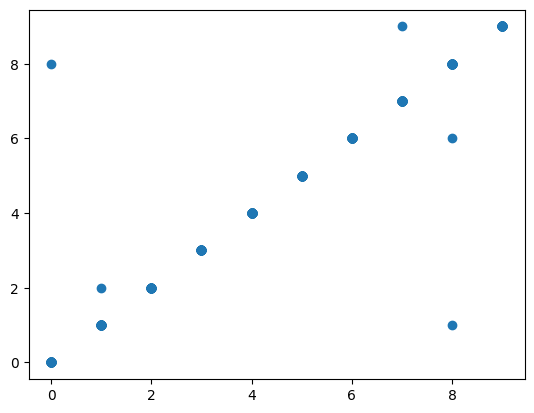

In [61]:
plt.scatter(out,y_test)

In [62]:
np.sum(out==y_test)/len(y_test)

0.9907407407407407

In [63]:
mlp.evaluate(x_test,y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9907


[0.05505385249853134, 0.9907407164573669]

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n